In [1]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
additional_metrics = ['accuracy']
loss_function = BinaryCrossentropy()
number_of_epochs = 10
optimizer = Adam()
verbosity_mode = 1
layer_size = 10

In [4]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [7]:
m=75000
n=25000
r=0.5

In [8]:
data=np.empty(n,dtype=int)
for i in range(0,n):
    data[i]=random.randint(0, 100000000)

In [9]:
mean = sum(data)/len(data)
std = np.std(data)
print(mean)
print(std)

-30447.47464
28808753.882125705
<ipython-input-9-7f0f3a9e79f6>:1: RuntimeWarning: overflow encountered in long_scalars
  mean = sum(data)/len(data)


In [10]:
new_data = []
for x in data:
    new_data+=[(x-mean)/std]

In [11]:
x = []
for i in new_data:
    x+=[[i]]
x_train = np.array(x)
y = []
for i in range(0,n):
    if(i<int(n*r)):
        y+=[[1]]
    else:
        y+=[[0]]
y_train = np.array(y)
print(x_train)
print(y_train)

[[0.17506194]
 [0.5305297 ]
 [0.35441187]
 ...
 [2.56122885]
 [1.61639287]
 [0.90947705]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [12]:
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/10
782/782 [==============================] - 3s 2ms/step - loss: 0.6998 - accuracy: 0.4993
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4966
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4986
Epoch 4/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5040
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4984
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.4999
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5060
Epoch 8/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.5033
Epoch 9/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5031
Epoch 10/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5020

In [13]:
import matplotlib.pyplot as plt

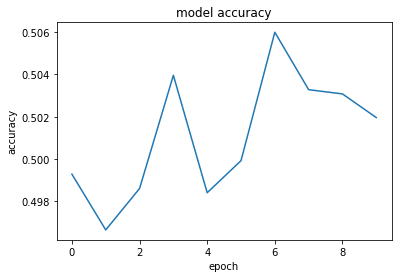

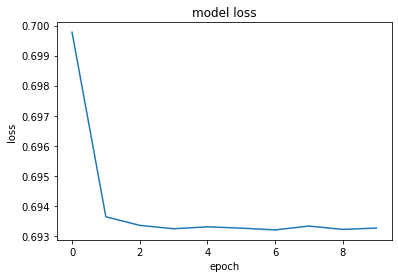

In [14]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [15]:
number_of_epochs = 10
layer_size = 50

In [16]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6942 - accuracy: 0.4971
Epoch 2/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5015
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.4967
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6935 - accuracy: 0.5028
Epoch 5/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.5040
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.4966
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5008
Epoch 8/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5024
Epoch 9/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4972
Epoch 10/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4973

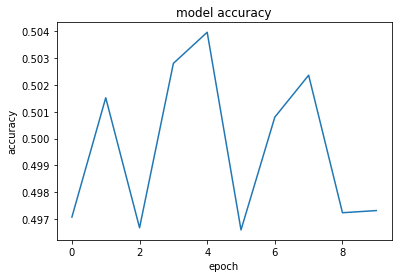

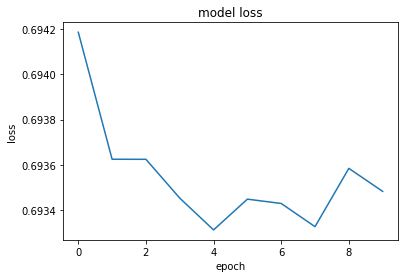

In [20]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [21]:
layer_size = 200
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
782/782 [==============================] - 3s 2ms/step - loss: 0.6943 - accuracy: 0.5002
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6936 - accuracy: 0.5032
Epoch 3/10
782/782 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.4990
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5001
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6933 - accuracy: 0.5014
Epoch 6/10
782/782

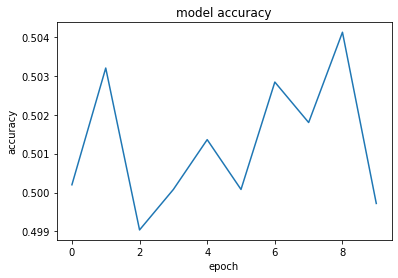

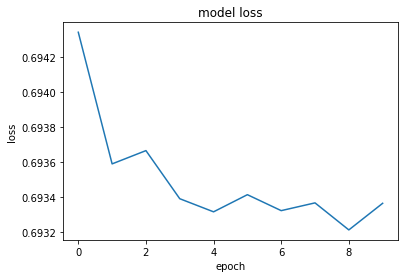

In [22]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [23]:
number_of_epochs = 30
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
782/782 [==============================] - 4s 3ms/step - loss: 0.6945 - accuracy: 0.4936
Epoch 2/30
782/782 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5054
Epoch 3/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5019
Epoch 4/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 5/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 6/30
782

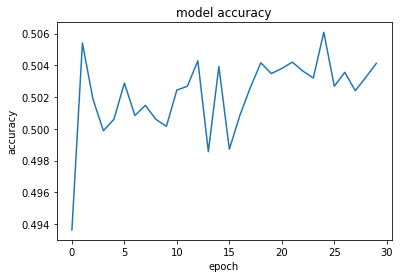

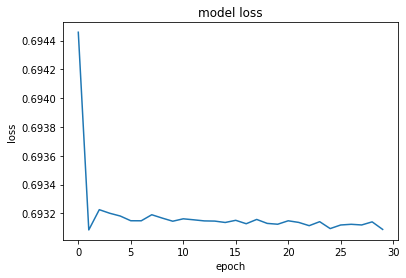

In [24]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [25]:
number_of_epochs = 30
layer_size = 10000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10000)             20000     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 10001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
782/782 [==============================] - 6s 6ms/step - loss: 0.6937 - accuracy: 0.4962
Epoch 2/30
782/782 [==============================] - 4s 6ms/step - loss: 0.6932 - accuracy: 0.4973
Epoch 3/30
782/782 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.5018
Epoch 4/30
782/782 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.5004
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 0.6932 - accuracy: 0.4958
Epoch 6/30
7

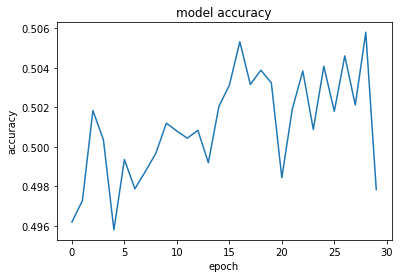

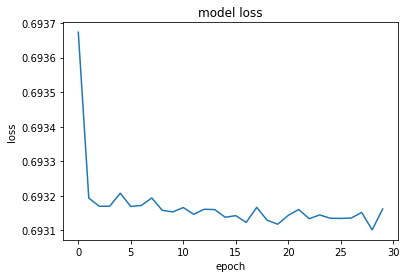

In [26]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size= 10000